## PROJECT TITLE: **House Sales in King County USA**

### **PART 1: IMPORTING DATA SETS**

In [1]:
#Import needed libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
print(os.getcwd())
#Specify the file path
Path = "/kaggle/input/house-prices-in-king-county-usa/kc_house_data_NaN.csv"
#Read the file
df = pd.read_csv(Path)

/kaggle/working


**NOTE: **

IN SOME CASES - YOU MIGHT NOT BE ABLE TO ACCESS THE FILE ONLINE AND THEREFORE TRY TO ACCES LOCALLY. IN THAT CASE YOU MAY GET MULTIPLE ERRORS. FIRST TRY TO REPLACE THE BACKSLASH WITH FORWARD SLASH IN FILE PATH. SECOND SAVE THE JUPYTER NOTEBOOK IN THE SAME DIRECTORY AS THAT FILE. IN THIS WAY THE ERROR - FILE NOT FOUND - WON'T HAPPEN. ABOVE CODE CAN BE USED.

In [3]:
#Loading data
df.to_csv('house_prices.csv')

In [4]:
#Read the data
df.head(4)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [5]:
#See datatypes of each column to see where to make changes
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#Get a summary of the whole data
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### PART 2: DATA WRANGLING

It is done to replace and drop values or change data types. 

In [7]:
#Dropping id and Unnamed:0 column
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace= True)

In [8]:
#Get summary of the data after values are dropped
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


After this, one must look for Null values in the data set.

In [9]:
#count null values in Bedroom and Bathroom
print('Number of null values in bathrooms:',df['bathrooms'].isnull().sum())
print('Number of null values in bedrooms:',df['bedrooms'].isnull().sum())

Number of null values in bathrooms: 10
Number of null values in bedrooms: 13


In [10]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)
df['bedrooms']

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
21608    3.0
21609    4.0
21610    2.0
21611    3.0
21612    2.0
Name: bedrooms, Length: 21613, dtype: float64

In [11]:
#Replace null values of bathrooms with mean
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace = True)
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

### Part 3: Exploratory Data Analysis

To see categorize in data and divide data into groups to make data analysis easier.

In [12]:
#Find the freq of each unique value in a certain column
value_counts = df['floors'].value_counts()
#View as a data frame
value_counts_df = value_counts.to_frame()
#See the frequency
print(value_counts_df)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


In [13]:
df['waterfront'][374:380]

374    0
375    0
376    0
377    0
378    0
379    0
Name: waterfront, dtype: int64

In [14]:
count = df['waterfront'].value_counts().get(1, 0)
count

163

<function matplotlib.pyplot.show(close=None, block=None)>

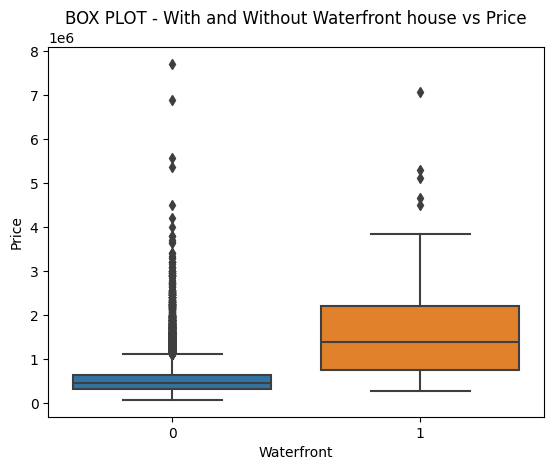

In [15]:
#To see impact of presence of waterfront in house on price - box plot
import seaborn as sns 
import matplotlib.pyplot as plt
#use seaborn for boxplot
sns.boxplot(x = 'waterfront', y = 'price', data = df)
#Provide labels using plt
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('BOX PLOT - With and Without Waterfront house vs Price')

#Display
plt.show

To find relationship between Continuous Variables- Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

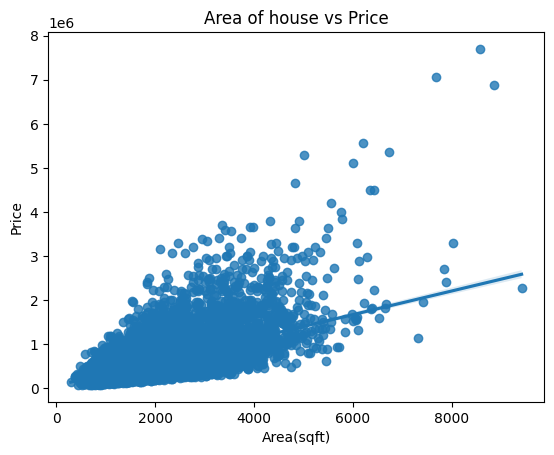

In [16]:
#Regression plot between area of house and price
sns.regplot(x = 'sqft_above', y ='price', data = df)
#Provide labels
plt.xlabel('Area(sqft)')
plt.ylabel('Price')
plt.title('Area of house vs Price')
#View plot
plt.show

### PART 4: MODEL DEVELOPMENT


In [17]:
df['long']

0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21608   -122.346
21609   -122.362
21610   -122.299
21611   -122.069
21612   -122.299
Name: long, Length: 21613, dtype: float64

In [18]:
#Linear Regression model for prediction b/w price and sqft
from sklearn.linear_model import LinearRegression
#Create the model object
lr = LinearRegression()
#Lets fit on the data
x = df[['sqft_living']]
y =df[['price']]
lr.fit(x,y)
#Find r-square from it
rsq = lr.score(x,y)
#Prediction from the fit
yhat = lr.predict(x)
print('R-square:', rsq)
print('Predict values:', yhat)

R-square: 0.4928532179037931
Predict values: [[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


##### MULTIPLE LINEAR REGRESSION MODEL

Just to see if this model rightly represents the data

In [19]:
#Features for this model
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [20]:
import numpy as np
Z = df[features]
#Lets fit this model
lr.fit(Z, y)
#Find r-square for it
rsqm = lr.score(Z, y)
#Make prediction
predictmlr = lr.predict(Z)
predictmlr, rsqm

(array([[285112.14176653],
        [661944.14176653],
        [309688.14176653],
        ...,
        [304056.14176653],
        [428472.14176653],
        [303800.14176653]]),
 0.6576862276276761)

#### PART 5: PIPELINE FOR DATA STANDARDIZATION

In [21]:
#inpute variable for pipeline - containing a tuple
input = [('scale', StandardScaler()), ('polynomial',PolynomialFeatures(include_bias= False)), ('model', LinearRegression())]

In [22]:
#Construct the pipeline object
pipe = Pipeline(input)
#Fit the object on the above data
pipe.fit(Z,y)
#Find r-square
rsqp = pipe.score(Z, y)
rsqp
#Prediction using Z
yhatp = pipe.predict(Z)
yhatp


array([[349639.5 ],
       [559108.5 ],
       [449453.25],
       ...,
       [417246.25],
       [459709.75],
       [417197.25]])

#### PART 6: Model Evaluation and Refinement

In [23]:
#in this process we do cross validation and train test splitting of data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [24]:
#Train test split data
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=1)
#Lets see the shape of test and train sets
print('Number of samples in training data:', x_train.shape[0])
print('Number of samples in testing data:', x_test.shape[0])

Number of samples in training data: 15129
Number of samples in testing data: 6484


In [25]:
#Ridge Regression object
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.1)
#Fit the model 
RR.fit(x_train, y_train)

Ridge(alpha=0.1)

In [26]:
#Find R-square
rsqr = RR.score(x_test, y_test)
rsqr

0.6504384355990995

In [27]:
#Ridge regression for 2nd order Polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Create and fit a Ridge regression object
ridge_model = Ridge(alpha=0.05)
ridge_model.fit(X_train_poly, y_train)

# Predict the target variable using the fitted Ridge model
predicted_prices = ridge_model.predict(X_test_poly)

# Calculate the R-squared value
r2 = ridge_model.score(X_test_poly, y_test)
r2

0.7475790301534717